<strong><b><font size="6">IMDB reviews Classification </font></b></strong> 

<h1>Tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
  

## Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [ ]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Hinnovis\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from nltk.corpus import movie_reviews

In [ ]:
len(movie_reviews.fileids())

2000

In [ ]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [ ]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [ ]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [ ]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [ ]:
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [ ]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [ ]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [ ]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [ ]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [ ]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


In [ ]:
data.head()

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos


### Lower casing

In [ ]:
data['review'] = data['review'].str.lower()

### Remove HTML tags 

In [ ]:
import re
def remove_html_tags(text):
    html_tags = r'<.*?>'
    without_html = re.sub(pattern=html_tags, repl=' ', string=text)
    return without_html
data['review'] = data['review'].apply(lambda x: remove_html_tags(x))

In [ ]:
data['review'][1]

'every now and then a movie comes along from a suspect studio , with every indication that it will be a stinker , and to everybody\'s surprise ( perhaps even the studio ) the film becomes a critical darling . \nmtv films\' _election , a high school comedy starring matthew broderick and reese witherspoon , is a current example . \ndid anybody know this film existed a week before it opened ? \nthe plot is deceptively simple . \ngeorge washington carver high school is having student elections . \ntracy flick ( reese witherspoon ) is an over-achiever with her hand raised at nearly every question , way , way , high . \nmr . " m " ( matthew broderick ) , sick of the megalomaniac student , encourages paul , a popular-but-slow jock to run . \nand paul\'s nihilistic sister jumps in the race as well , for personal reasons . \nthe dark side of such sleeper success is that , because expectations were so low going in , the fact that this was quality stuff made the reviews even more enthusiastic tha

### Remove punctuation

In [ ]:
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit's overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out wh

In [ ]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
import re
data['review'] = data['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [ ]:
#verification
data.review[2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

### Remove URLs 

In [ ]:
def remove_urls(text):
    url_staf = r'https?://\S+|www\.\S+'
    without_urls = re.sub(pattern=url_staf, repl=' ',string=text)
    return without_urls
data['review'] = data['review'].apply(lambda x: remove_html_tags(x))

In [ ]:
data['review'][2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

### Converting numbers to words

In [ ]:
pip install num2words

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=ae73f3d19a2438fe690dd5471c813e7c246ede5c06ab2cd11ba9aab7546b0753
  Stored in directory: c:\users\hinnovis\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from num2words import num2words
def num_to_words(text):
    after_spliting = text.split()
    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

In [ ]:
data['review'] = data['review'].apply(lambda x: num_to_words(x))

In [ ]:
data['review'][3]

'jaws is a rare film that grabs your attention before it shows you a single image on screen the movie opens with blackness and only distant alienlike underwater sounds then it comes the first ominous bars of composer john williams now infamous score dahdum from there director steven spielberg wastes no time taking us into the water on a midnight swim with a beautiful girl that turns deadly right away he lets us know how vulnerable we all are floating in the ocean and once jaws has attacked it never relinquishes its grip perhaps what is most outstanding about jaws is how spielberg builds the movie he works it like a theatrical production with a first act and a second act unlike so many modern filmmakers he has a great deal of restraint and refuses to show us the shark until the middle of the second act until then he merely suggests its presence with creepy subjective underwater shots and williams music hes building the tension bit by bit so when it comes time for the climax the sharks a

### Spelling Corrrection

In [ ]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from spellchecker import SpellChecker
spell_corrector = SpellChecker()
# spelling correction using spellchecker

def spell_correction(text):
    # initialize empty list to save correct spell words
    correct_words = []
    # extract spelling incorrect words by using unknown function of spellchecker 
    misSpelled_words = spell_corrector.unknown(text.split())
    for each_word in text.split():
        if each_word in misSpelled_words:
            right_word = spell_corrector.correction(each_word)
            correct_words.append(right_word)
        else:
            correct_words.append(each_word)
     # joining correct_words list into single string
    correct_spelling = ' '.join(correct_words)
    return correct_spelling


In [ ]:
data['review'] = data['review'].apply(lambda x: spell_correction(x))

### Convert accented characters to ascii characters

In [ ]:
import unidecode

def accented_to_ascii(text):
    text = unidecode.unidecode(text)
    return text


In [ ]:
data['review'] = data['review'].apply(lambda x: accented_to_ascii(x))

In [ ]:
data['review'][1]

'every now and then a movie comes along from a suspect studio with every indication that it will be a stinker and to everybodys surprise perhaps even the studio the film becomes a critical darling mav films election a high school comedy starring matthew broderick and reese witherspoon is a current example did anybody know this film existed a week before it opened the plot is deceptively simple george washington carver high school is having student elections tracy flick reese witherspoon is an overachiever with her hand raised at nearly every question way way high my i matthew broderick sick of the megalomaniac student encourages paul a popularbutslow jock to run and pals nihilistic sister jumps in the race as well for personal reasons the dark side of such sleeper success is that because expectations were so low going in the fact that this was quality stuff made the reviews even more enthusiastic than they have any right to be you cant help going in with the baggage of glowing reviews 

### Converting chat conversion words to normal words

In [ ]:
short_form_list = open(r'C:\Users\Hinnovis\Desktop\translating_words.txt.txt','r')
chat_words_str = short_form_list.read()
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
     if line != "":
        try:
            cw = line.split("=")[0]
            cw_expanded = line.split("=")[1]
            chat_words_list.append(cw)
            chat_words_map_dict[cw] = cw_expanded
        except:
            print("Perfecto !! ")
chat_words_list = set(chat_words_list)
print(chat_words_map_dict)
def short_to_original(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)


Perfecto !! 
{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off',

In [ ]:
data['review'] = data['review'].apply(lambda x: short_to_original(x))

In [ ]:
data['review'][1]

'every now and then a movie comes along from a suspect studio with every indication that it will be a stinker and to everybodys surprise perhaps even the studio the film becomes a critical darling mav films election a high school comedy starring matthew broderick and reese witherspoon is a current example did anybody know this film existed a week before it opened the plot is deceptively simple george washington carver high school is having student elections tracy flick reese witherspoon is an overachiever with her hand raised at nearly every question way way high my i matthew broderick sick of the megalomaniac student encourages paul a popularbutslow jock to run and pals nihilistic sister jumps in the race as well for personal reasons the dark side of such sleeper success is that because expectations were so low going in the fact that this was quality stuff made the reviews even more enthusiastic than they have any right to be you cant help going in with the baggage of glowing reviews 

### Emoticons words

In [ ]:
EMOTICONS= {
    u":‑)":"Happy face or smiley",
    u":-))":"Very Happy face or smiley",
    u":-)))":"Very very Happy face or smiley",
    u":)":"Happy face or smiley",
    u":))":"Very Happy face or smiley",
    u":)))":"Very very Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, angry or pouting",
    u":‑(":"Frown, sad, angry or pouting",
    u":(":"Frown, sad, angry or pouting",
    u":‑c":"Frown, sad, angry or pouting",
    u":c":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑[":"Frown, sad, angry or pouting",
    u":[":"Frown, sad, angry or pouting",
    u":-||":"Frown, sad, angry or pouting",
    u">:[":"Frown, sad, angry or pouting",
    u":{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:(":"Frown, sad, angry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"

}


In [ ]:
def emoticons_words(text):
    for emot in EMOTICONS:
        emoticon_pattern=r'('+emot+r')'
        emoticon_words = EMOTICONS[emot]
        replace_text = emoticon_words.replace(",","")
        replace_text = replace_text.replace(":","")
        replace_text_list = replace_text.split()
        emoticon_name = '_'.join(replace_text_list)
        text = re.sub(emoticon_pattern, emoticon_name, text)
    return text

### Remove frequent words

In [ ]:
from collections import Counter
def freq_words(text):
    FrequentWords = []
    tokens = word_tokenize(text)
    for word in tokens:
        counter[word]+=1
# take top 10 frequent words
    for (word, word_count) in counter.most_common(10):
        FrequentWords.append(word)
    return FrequentWords

In [ ]:
def remove_fw(text,FrequentWords):
    tokens = word_tokenize(text)
    without_fw = []
    for word in tokens:
        if word not in FrequentWords:
            without_fw.append(word)

    without_fw = ' '.join(without_fw)
    return without_fw

In [ ]:
counter = Counter()
data['review'] = data['review'].apply(lambda x: remove_fw(x,freq_words(x)))
print(counter.most_common(10))

[('plot', 1432), ('could', 1392), ('bad', 1371), ('scene', 1370), ('movies', 1338), ('thousand', 1300), ('doesnt', 1255), ('scenes', 1241), ('dont', 1201), ('know', 1200)]


### Remove rare words

In [ ]:
from collections import Counter
def rare_words(text):
    # tokenization
    tokens = word_tokenize(text)
    for word in tokens:
        counter[word]+=1
    RareWords = []
    number_rare_words = 10
    # take top 10 frequent words
    frequentWords = counter.most_common()
    RareWords.append(word)
    for (word, word_count) in frequentWords[:-number_rare_words:-1]:
        RareWords.append(word)
    return RareWords

def remove_rw(text, RareWords):
    tokens = word_tokenize(text)
    without_rw = []
    for word in tokens:
        if word not in RareWords:
            without_rw.append(word)
    without_rw =' '.join(without_rw)
    return without_rw

In [ ]:
counter = Counter()
data['review'] = data['review'].apply(lambda x: remove_rw(x,rare_words(x)))
counter.most_common()[:-10:-1]

[('howeverthese', 1),
 ('pelvic', 1),
 ('buti', 1),
 ('alreadythin', 1),
 ('lorne', 1),
 ('hideaways', 1),
 ('faring', 1),
 ('105minute', 1),
 ('1987s', 1)]

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hinnovis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = stopwords.words('english')

In [ ]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [ ]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

data['review'] = data['review'].apply(lambda x: remove_stopwords(x))


In [ ]:
#verification
data.review[2]

'youve got mail works alot deserves order cast extremely popular attractive stars share screen hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes work absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing helmed woman havent quite yet figured liked youve got mail important something storyline cliched come tom hanks plays joe fox insanely likeable owner discount chain meg ryan plays kathleen kelley insanely likeable proprietor familyrun childrens shop nice homage shop around corner fox kelley soon become bitter rivals fox store opening right across block small business know already internet neither party knows persons true rest story isnt important serve mere backdrop stars share screen sure 

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [ ]:
#import nltk
#nltk.download('punkt')
#data["review"] = data["review"].apply(lambda x: word_tokenize(x))
#data["review"]

__Word Tokenizing:__

### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [ ]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["review"] = data["review"].apply(lambda x: stem_words(x))

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
data["review"] = data["review"].apply(lambda text: lemmatize_words(text))

__Bag of Words using CountVectorizer:__


In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
corpus=data["review"]
count_vector = CountVectorizer() 
X = count_vector.fit_transform(corpus).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
word_count = count_vector.get_feature_names()
print(word_count)

['0009f', '000aweek', '000paltri', '100m', '100minut', '101yearold', '11thhour', '150th', '1600', '16x9', '175million', '1800', '1830', '1900', '1930', '1940', '1949', '1950', '1960', '1970', '1971', '1972', '1973', '1975', '1979', '1980', '1981', '1982', '1984', '1985', '1986', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1997the', '1998', '1999', '19thcenturi', '2000', '2000pound', '200page', '216digit', '21stcenturi', '24thcenturi', '25andund', '600pound', '60s70', '70searli', '777film', 'aaaaaaaaah', 'aaliyah', 'ab', 'abandon', 'abb', 'abba', 'abbi', 'abbott', 'abc', 'abduct', 'abe', 'abel', 'aberdeen', 'abet', 'abhorr', 'abid', 'abigail', 'abil', 'abl', 'abli', 'abnorm', 'aboard', 'abod', 'abolish', 'abolitionist', 'abomin', 'aborigin', 'abort', 'abortionist', 'abound', 'aboveaverag', 'aboveground', 'abovepar', 'abovethetitl', 'abraham', 'abras', 'abroad', 'abrupt', 'abruptli', 'absenc', 'absent', 'absentminded', 'absinth', 'absolut', 'absolutis

In [ ]:
frequency_matrix = pd.DataFrame(X,columns=count_vector.get_feature_names())
frequency_matrix

,0009f,000aweek,000paltri,100m,100minut,101yearold,11thhour,150th,1600,16x9,...,zoo,zookeep,zooland,zoologist,zoom,zoot,zorro,zuko,zweibel,zwigoff
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important. 
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print('Tfidf ponderations')


# Initialize the "TfidfVectorizer" object.
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['review'])

# Numpy arrays are easy to work with, so convert the result to an array
vectorizer_features = X_tfidf.toarray()
tfidf_frequency_matrix = pd.DataFrame(vectorizer_features,columns=tfidf_vect.get_feature_names())
tfidf_frequency_matrix

Tfidf ponderations


,0009f,000aweek,000paltri,100m,100minut,101yearold,11thhour,150th,1600,16x9,...,zoo,zookeep,zooland,zoologist,zoom,zoot,zorro,zuko,zweibel,zwigoff
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
feature_names = np.array(tfidf_vect.get_feature_names())
sorted_by_idf = np.argsort(tfidf_vect.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['play' 'make' 'go' 'take' 'come' 'end' 'look' 'seem' 'work' 'thing']

Features with highest idf:
['iggyesuq' 'ignorantli' 'iguana' 'sharpen' 'ihr' 'iiithough' 'ike'
 'iknow' 'ig' '0009f']


In [ ]:
#frequency distribution of the class attribute
print(pd.crosstab(index=data["label"],columns="count"))

col_0  count
label       
neg     1000
pos     1000


In [ ]:
data

,review,label
0,research subject would say michael jackson loo...,pos
1,movi come along suspect studio indic stinker e...,pos
2,youv got mail work alot deserv order cast extr...,pos
3,rare grab attent show singl imag screen open b...,pos
4,moviemak lot gener manag ifl team postsalari c...,pos
...,...,...
1995,anyth taken warn releas similarlythem rel clos...,neg
1996,john doorman pardon goofi cinemat debacl funda...,neg
1997,hall acquir tast took least season watch show ...,neg
1998,john carpent great horror director cours best ...,neg


In [ ]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest = train_test_split(data,train_size=0.8,random_state=1,stratify=data['label'])

In [ ]:
dataTrain

,review,label
1957,recent night young director name baz luhrmann ...,neg
1800,four earn jami lee curti titl scream queen ear...,neg
1956,godzilla ultim culmin care summer loo remak ni...,neg
752,youv probabl heard priest rabbi dosag featherw...,pos
1525,bad hype rememb case box helena nine ninety-th...,neg
...,...,...
1499,best thing fact thing dark citi made want go c...,neg
1211,tim robbin martin lawrenc team road comedi rob...,neg
852,selfproclaim profession critic somewhat embarr...,pos
544,matter suspect isnt usual action thriller usua...,pos


In [ ]:
dataTrain.groupby(['label']).size()

label
neg    800
pos    800
dtype: int64

In [ ]:
dataTest.groupby(['label']).size()

label
neg    200
pos    200
dtype: int64

In [ ]:
#*** Generate the document term matrix - train set ***

#import the CountVectorizer tool
from sklearn.feature_extraction.text import CountVectorizer

#instantiation of the objet
parseur = CountVectorizer(binary=True)

#create the document term matrix
XTrain = parseur.fit_transform(dataTrain['review'])

In [ ]:
XTrain

<1600x17248 sparse matrix of type '<class 'numpy.int64'>'
	with 356179 stored elements in Compressed Sparse Row format>

In [ ]:
print(parseur.get_feature_names())

['0009f', '000aweek', '000paltri', '100m', '100minut', '11thhour', '150th', '1600', '16x9', '175million', '1800', '1830', '1900', '1930', '1940', '1949', '1950', '1960', '1970', '1971', '1972', '1973', '1975', '1979', '1980', '1981', '1982', '1984', '1985', '1986', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1997the', '1998', '1999', '19thcenturi', '2000', '2000pound', '216digit', '21stcenturi', '24thcenturi', '25andund', '600pound', '60s70', '70searli', '777film', 'aaliyah', 'ab', 'abandon', 'abb', 'abba', 'abbi', 'abbott', 'abc', 'abduct', 'abe', 'abel', 'aberdeen', 'abet', 'abhorr', 'abid', 'abigail', 'abil', 'abl', 'abli', 'abnorm', 'aboard', 'abod', 'abolish', 'abolitionist', 'abomin', 'aborigin', 'abort', 'abortionist', 'abound', 'aboveaverag', 'aboveground', 'abovepar', 'abovethetitl', 'abraham', 'abras', 'abroad', 'abrupt', 'abruptli', 'absenc', 'absent', 'absentminded', 'absinth', 'absolut', 'absolutist', 'absolv', 'absorb', 'absorpt', 'abs

In [ ]:
#transform the sparse matrix into a numpy matrix
mdtTrain = XTrain.toarray()

#type of the matrix
print(type(mdtTrain))

#size of the matrix
print(mdtTrain.shape)

<class 'numpy.ndarray'>
(1600, 17248)


In [ ]:
#frequency of the terms
freq_mots = np.sum(mdtTrain,axis=0)#sum since we are using binary ponderation
print(freq_mots)
print('****')
#argmax
index = np.argsort(freq_mots)
print(index)
print('****')
#print the terms and their frequency
imp = {'terme':np.asarray(parseur.get_feature_names())[index],'freq':freq_mots[index]}
print(pd.DataFrame(imp).sort_values(by='freq', ascending=False))

[1 1 1 ... 2 1 1]
****
[    0  8485  8483 ...  2829  9030 11378]
****
           terme  freq
17247       play   939
17246       make   873
17245       come   859
17244         go   847
17243       take   845
...          ...   ...
3180    ostertag     1
3181   ostentati     1
3182        osso     1
3183       osiri     1
0          0009f     1

[17248 rows x 2 columns]


In [ ]:
#***** MIN FREQUENCY

#rebuild the parser with new options : min_df = 10
parseurBis = CountVectorizer(stop_words='english',binary=True, min_df = 10)
XTrainBis = parseurBis.fit_transform(dataTrain['review'])

#number of tokens
print(len(parseurBis.get_feature_names()))

#mdt_bis
mdtTrainBis = XTrainBis.toarray()

5005


In [ ]:
#import the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#instatiate the object
knn_classifier = KNeighborsClassifier(n_neighbors=2)

#perform the training process
knn_classifier.fit(mdtTrainBis,dataTrain['label'])



KNeighborsClassifier(n_neighbors=2)

In [ ]:
#generate the document term matrix for the test set
#using the object learned from the train set
#import the metrics class for the performance measurement
from sklearn import metrics

#create the document term matrix
mdtTestBis = parseurBis.transform(dataTest['review'])

#prediction for the test set
predTestBis = knn_classifier.predict(mdtTestBis)

#confusion matrix
print('***Confusion matrix')
mcTestBis = metrics.confusion_matrix(dataTest['label'],predTestBis)

***Confusion matrix


In [ ]:
#recall
print('Recall')
print(metrics.recall_score(dataTest['label'],predTestBis,pos_label='neg'))

#precision
print('precision')
print(metrics.precision_score(dataTest['label'],predTestBis,pos_label='neg'))

#F1-Score
print('F1-Score')
print(metrics.f1_score(dataTest['label'],predTestBis,pos_label='neg'))

#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(dataTest['label'],predTestBis))

Recall
1.0
precision
0.5
F1-Score
0.6666666666666666
accuracy rate -->
0.5


### Hyperparameter tuning

In [ ]:
k_range=range(1,35)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(mdtTrainBis, dataTrain['label'])
    predTestBis=knn.predict(mdtTestBis)
    scores.append(metrics.accuracy_score(dataTest['label'], predTestBis))

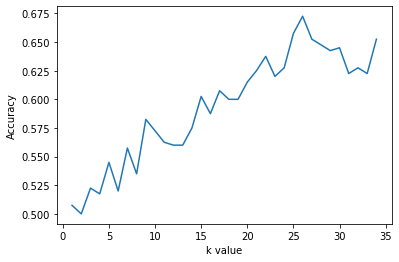

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
import numpy as np
np.max(scores)

0.6725

### LOGISTIC REGRESSION

In [ ]:
#*** train the classifier

#import the class LogistiRegression
from sklearn.linear_model import LogisticRegression

#instatiate the object
modelBis = LogisticRegression()

#perform the training process
modelBis.fit(mdtTrainBis,dataTrain['label'])

#generate the document term matrix for the test set
#using the object learned from the train set


#import the metrics class for the performance measurement
#from sklearn import metrics

#create the document term matrix for test
mdtTestBis = parseurBis.transform(dataTest['review'])

#prediction for the test set
predTestBis = modelBis.predict(mdtTestBis)

#confusion matrix
print('***Confusion matrix')
mcTestBis = metrics.confusion_matrix(dataTest['label'],predTestBis)
print(mcTestBis)

#recall
print('Recall')
print(metrics.recall_score(dataTest['label'],predTestBis,pos_label='neg'))

#precision
print('precision')
print(metrics.precision_score(dataTest['label'],predTestBis,pos_label='neg'))

#F1-Score
print('F1-Score')
print(metrics.f1_score(dataTest['label'],predTestBis,pos_label='neg'))

#accuracy rate
print('accuracy rate -->')
print(metrics.accuracy_score(dataTest['label'],predTestBis))

***Confusion matrix
[[175  25]
 [ 34 166]]
Recall
0.875
precision
0.8373205741626795
F1-Score
0.8557457212713937
accuracy rate -->
0.8525


In [ ]:
modelBis.coef_

array([[ 0.06190688, -0.34302794,  0.0839147 , ..., -0.07139492,
        -0.1537861 ,  0.04318937]])

In [ ]:
#***** REMOVE TERMS WITH COEFFICIENTS NEARLY ZERO
#Tout d’abord il nous faut caractériser les coefficients du modèle. Nous les passons en valeur absolue et nous calculons plusieurs quantiles.

#absolute  value of the coefficients
coef_abs = np.abs(modelBis.coef_[0,:])

coef_abs

array([0.06190688, 0.34302794, 0.0839147 , ..., 0.07139492, 0.1537861 ,
       0.04318937])

In [ ]:
#percentiles of the coefficients (absolute value)
thresholds = np.percentile(coef_abs,[0,25,50,75,90,100])
print(thresholds)

[1.52666331e-04 3.51255032e-02 7.60214026e-02 1.36665154e-01
 2.19757837e-01 1.00820633e+00]


In [ ]:
#identify the coefficients "significantly higher than zero
#use 1st quartile as threshold
indices = np.where(coef_abs > thresholds[2])
print(len(indices[0]))

2648


In [ ]:
#create the new document term matrices

#document term matrices - train and test sets
mdtTrainTer = mdtTrainBis[:,indices[0]]#toutes les lignes et uniquement les colones 
mdtTestTer = mdtTestBis[:,indices[0]]

#checking
print(mdtTrainTer.shape)
print(mdtTestTer.shape)

(1600, 2648)
(400, 2648)


In [ ]:
#instatiate the object
modelTer = LogisticRegression()

#train a new classifier with selected terms
modelTer.fit(mdtTrainTer,dataTrain['label'])

#prediction on the test set
predTestTer = modelTer.predict(mdtTestTer)

#confusion matrix
mcTestTer = metrics.confusion_matrix(dataTest['label'],predTestTer)
print(mcTestTer)

[[172  28]
 [ 31 169]]


In [ ]:
#selected terms
sel_terms = np.array(parseurBis.get_feature_names())[indices[0]]

#sorted indices of the absolute value coefficients
sorted_indices = np.argsort(np.abs(modelTer.coef_[0,:]))

#print the terms and theirs coefficients
imp = {'term':np.asarray(sel_terms)[sorted_indices],'coef':modelTer.coef_[0,:][sorted_indices]}
#Les 10 termes les plus discriminants dans le modèle sont (avec les coefficients associés) :
print(pd.DataFrame(imp).sort_values(by='coef', ascending=False).head(10))

         term      coef
2642  surpris  0.725737
2641    thank  0.724306
2639   hilari  0.708211
2635    enjoy  0.655290
2633      fun  0.649994
2631    excel  0.628528
2630  sometim  0.626082
2629    great  0.619830
2628     flaw  0.618240
2626     town  0.615431


In [ ]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [ ]:
contractions_dict = {"ain't": "are not","'s":" is","aren't": "are not"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [ ]:

#document to classify
doc = ['this is a new free service for you only']

#document preprocessing
doc=expand_contractions(str(doc))
doc = str(doc).lower()
doc = re.sub('[%s]' % re.escape(string.punctuation), '' , str(doc))
doc = re.sub('[%s]' % re.escape(string.punctuation), '' ,  str(doc))
doc =re.sub(r'\b[0-9]+\b\s*', '', str(doc))
doc = remove_stopwords(str(doc))

#get its description
desc = parseurBis.transform([doc])
print(desc)

  (0, 1906)	1
  (0, 3177)	1


In [ ]:

doc = ["Hello elasri.ikram, You are customer #0836901 by Amazon Rewards and we have been waiting for your confirmation since. This delivery is for elasri.ikram To activate delivery, validate here! Cordially,, Amazon reward"]
#document preprocessing
doc=expand_contractions(str(doc))
doc = str(doc).lower()
doc = re.sub('[%s]' % re.escape(string.punctuation), '' , str(doc))
doc =re.sub(r'\b[0-9]+\b\s*', '', str(doc))
doc = remove_stopwords(str(doc))

#get its description
desc = parseurBis.transform([doc])
print(desc)

  (0, 3941)	1


In [ ]:
doc

'hello elasriikram customer amazon rewards waiting confirmation since delivery elasriikram activate delivery validate cordially amazon reward'

In [ ]:
print(np.asarray(parseurBis.get_feature_names())[desc.indices])

['reward']


In [ ]:
#dense representation
dense_desc = desc.toarray()

#apply var. selection
dense_sel = dense_desc[:,indices[0]]

In [ ]:
dense_desc 

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
#prediction of the class membership
pred_doc = modelTer.predict(dense_sel)
print(pred_doc)

['neg']


In [ ]:
#prediction of the class membership probabilities
pred_proba = modelTer.predict_proba(dense_sel)
print(pred_proba)

[[0.73760705 0.26239295]]
